# Note : This dataset downloaded from kaggle website.

# About Dataset

## context

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.


## content

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients.

In the boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

1. sex: 1 for female and 2 for male.
2. age: of the patient.
3. **classification:** covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
4. patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
5. pneumonia: whether the patient already have air sacs inflammation or not.
6. pregnancy: whether the patient is pregnant or not.
7. diabetes: whether the patient has diabetes or not.
8. copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
9. asthma: whether the patient has asthma or not.
10. inmsupr: whether the patient is immunosuppressed or not.
11. hypertension: whether the patient has hypertension or not.
12. cardiovascular: whether the patient has heart or blood vessels related disease.
13. renal chronic: whether the patient has chronic renal disease or not.
14. other disease: whether the patient has other disease or not.
15. obesity: whether the patient is obese or not.
16. tobacco: whether the patient is a tobacco user.
17. usmr: Indicates whether the patient treated medical units of the first, second or third level.
18. medical unit: type of institution of the National Health System that provided the care.
19. intubed: whether the patient was connected to the ventilator.
20. icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
21. date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [1]:
#pip install keras_tuner

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras_tuner as k
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential # creates network in sequential form
from keras.layers import Dense   # creates fully connected layers
from keras.layers import Dropout, BatchNormalization, Input
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from keras.regularizers import L1,L2,L1L2
from keras.initializers import Zeros,ones,GlorotNormal,GlorotUniform,HeNormal,HeUniform,RandomNormal,RandomUniform  # w.t's initializers


Using TensorFlow backend


In [3]:
#pip install imbalanced-learn

In [4]:
import imblearn

In [5]:
#df = pd.read_csv(r"C:\Users\hp\Downloads\Data Science Innomatics\DS written notes\Deep_learning\D_L_Projects\Covid Data.csv")

In [40]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Data Science Innomatics\DS written notes\Deep_learning\D_L_Projects\Covid Data.csv")

In [41]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [42]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [44]:
df["CLASIFFICATION_FINAL"].unique()

array([3, 5, 7, 6, 1, 2, 4], dtype=int64)

In [45]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [46]:
df.duplicated().sum()

812049

In [47]:
df.drop_duplicates(inplace = True)

In [48]:
df.duplicated().sum()

0

In [49]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236526 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 236526 non-null  int64 
 1   MEDICAL_UNIT          236526 non-null  int64 
 2   SEX                   236526 non-null  int64 
 3   PATIENT_TYPE          236526 non-null  int64 
 4   DATE_DIED             236526 non-null  object
 5   INTUBED               236526 non-null  int64 
 6   PNEUMONIA             236526 non-null  int64 
 7   AGE                   236526 non-null  int64 
 8   PREGNANT              236526 non-null  int64 
 9   DIABETES              236526 non-null  int64 
 10  COPD                  236526 non-null  int64 
 11  ASTHMA                236526 non-null  int64 
 12  INMSUPR               236526 non-null  int64 
 13  HIPERTENSION          236526 non-null  int64 
 14  OTHER_DISEASE         236526 non-null  int64 
 15  CARDIOVASCULAR  

# making classification_final feature as Binary_class [0,1]

In [51]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [52]:
df['CLASIFFICATION_FINAL'].unique()

array([3, 5, 7, 6, 1, 2, 4], dtype=int64)

In [53]:
df['CLASIFFICATION_FINAL']  = df['CLASIFFICATION_FINAL'].map({1:0, 2:0,3:0, 4:1, 5:1, 6:1, 7:1}) # 0--> covid_posi, 1--> covid_neg

In [54]:
df['CLASIFFICATION_FINAL'].unique()

array([0, 1], dtype=int64)

In [55]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,0,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,1,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,0,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,1,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,0,97


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236526 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 236526 non-null  int64 
 1   MEDICAL_UNIT          236526 non-null  int64 
 2   SEX                   236526 non-null  int64 
 3   PATIENT_TYPE          236526 non-null  int64 
 4   DATE_DIED             236526 non-null  object
 5   INTUBED               236526 non-null  int64 
 6   PNEUMONIA             236526 non-null  int64 
 7   AGE                   236526 non-null  int64 
 8   PREGNANT              236526 non-null  int64 
 9   DIABETES              236526 non-null  int64 
 10  COPD                  236526 non-null  int64 
 11  ASTHMA                236526 non-null  int64 
 12  INMSUPR               236526 non-null  int64 
 13  HIPERTENSION          236526 non-null  int64 
 14  OTHER_DISEASE         236526 non-null  int64 
 15  CARDIOVASCULAR  

In [57]:
## Now let us see the unique values for each column.
for i in df.columns:
    if(i!='AGE' and i!='DATE_DIED'):
        print(i," -> ", dict(df[i].value_counts()))

USMER  ->  {2: 121181, 1: 115345}
MEDICAL_UNIT  ->  {4: 88728, 12: 84278, 6: 20998, 9: 13861, 3: 8969, 8: 6439, 10: 4598, 5: 4495, 11: 2319, 13: 817, 7: 756, 2: 145, 1: 123}
SEX  ->  {2: 129503, 1: 107023}
PATIENT_TYPE  ->  {2: 136644, 1: 99882}
INTUBED  ->  {97: 99882, 2: 98844, 1: 32295, 99: 5505}
PNEUMONIA  ->  {2: 129609, 1: 99730, 99: 7187}
PREGNANT  ->  {97: 129503, 2: 102049, 1: 3020, 98: 1954}
DIABETES  ->  {2: 159930, 1: 73756, 98: 2840}
COPD  ->  {2: 219928, 1: 14069, 98: 2529}
ASTHMA  ->  {2: 217984, 1: 16036, 98: 2506}
INMSUPR  ->  {2: 221310, 1: 12290, 98: 2926}
HIPERTENSION  ->  {2: 145901, 1: 88005, 98: 2620}
OTHER_DISEASE  ->  {2: 212584, 1: 19580, 98: 4362}
CARDIOVASCULAR  ->  {2: 216012, 1: 17911, 98: 2603}
OBESITY  ->  {2: 170644, 1: 63328, 98: 2554}
RENAL_CHRONIC  ->  {2: 216891, 1: 17104, 98: 2531}
TOBACCO  ->  {2: 201163, 1: 32625, 98: 2738}
CLASIFFICATION_FINAL  ->  {1: 123238, 0: 113288}
ICU  ->  {2: 115607, 97: 99882, 1: 15383, 99: 5654}


In [58]:
## Now let us see the unique values for each column.
for i in df.columns:
    if(i!='AGE' and i!='DATE_DIED'):
        print(i," -> ", str(df[i].unique()))

USMER  ->  [2 1]
MEDICAL_UNIT  ->  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
SEX  ->  [1 2]
PATIENT_TYPE  ->  [1 2]
INTUBED  ->  [97  1  2 99]
PNEUMONIA  ->  [ 1  2 99]
PREGNANT  ->  [ 2 97 98  1]
DIABETES  ->  [ 2  1 98]
COPD  ->  [ 2  1 98]
ASTHMA  ->  [ 2  1 98]
INMSUPR  ->  [ 2  1 98]
HIPERTENSION  ->  [ 1  2 98]
OTHER_DISEASE  ->  [ 2  1 98]
CARDIOVASCULAR  ->  [ 2  1 98]
OBESITY  ->  [ 2  1 98]
RENAL_CHRONIC  ->  [ 2  1 98]
TOBACCO  ->  [ 2  1 98]
CLASIFFICATION_FINAL  ->  [0 1]
ICU  ->  [97  2  1 99]


In [59]:
df["DIABETES"].replace(98, np.nan, inplace = True)
df["DIABETES"] = df["DIABETES"].fillna(1)
df["DIABETES"] = df["DIABETES"].astype(int)




df["INTUBED"].replace(99, np.nan, inplace = True)
df["INTUBED"].replace(97, np.nan, inplace = True)

df["INTUBED"] = df["INTUBED"].fillna(1)
df["INTUBED"] = df["INTUBED"].astype(int)


df["PNEUMONIA"].replace(99, np.nan, inplace = True)

df["PNEUMONIA"] = df["PNEUMONIA"].fillna(1)
df["PNEUMONIA"] = df["PNEUMONIA"].astype(int)


df["PREGNANT"].replace(98, np.nan, inplace = True)
df["PREGNANT"].replace(97, np.nan, inplace = True)

df["PREGNANT"] = df["PREGNANT"].fillna(1)
df["PREGNANT"] = df["PREGNANT"].astype(int)


df["COPD"].replace(98, np.nan, inplace = True)

df["COPD"] = df["COPD"].fillna(1)
df["COPD"] = df["COPD"].astype(int)


df["ASTHMA"].replace(98, np.nan, inplace = True)

df["ASTHMA"] = df["ASTHMA"].fillna(1)
df["ASTHMA"] = df["ASTHMA"].astype(int)


df["INMSUPR"].replace(98, np.nan, inplace = True)

df["INMSUPR"] = df["INMSUPR"].fillna(1)
df["INMSUPR"] = df["INMSUPR"].astype(int)


df["HIPERTENSION"].replace(98, np.nan, inplace = True)

df["HIPERTENSION"] = df["HIPERTENSION"].fillna(1)
df["HIPERTENSION"] = df["HIPERTENSION"].astype(int)


df["OTHER_DISEASE"].replace(98, np.nan, inplace = True)

df["OTHER_DISEASE"] = df["OTHER_DISEASE"].fillna(1)
df["OTHER_DISEASE"] = df["OTHER_DISEASE"].astype(int)



df["CARDIOVASCULAR"].replace(98, np.nan, inplace = True)

df["CARDIOVASCULAR"] = df["CARDIOVASCULAR"].fillna(1)
df["CARDIOVASCULAR"] = df["CARDIOVASCULAR"].astype(int)


df["OBESITY"].replace(98, np.nan, inplace = True)

df["OBESITY"] = df["OBESITY"].fillna(1)
df["OBESITY"] = df["OBESITY"].astype(int)


df["OBESITY"].replace(98, np.nan, inplace = True)

df["OBESITY"] = df["OBESITY"].fillna(1)
df["OBESITY"] = df["OBESITY"].astype(int)



df["RENAL_CHRONIC"].replace(98, np.nan, inplace = True)

df["RENAL_CHRONIC"] = df["RENAL_CHRONIC"].fillna(1)
df["RENAL_CHRONIC"] = df["RENAL_CHRONIC"].astype(int)



df["TOBACCO"].replace(98, np.nan, inplace = True)

df["TOBACCO"] = df["TOBACCO"].fillna(1)
df["TOBACCO"] = df["TOBACCO"].astype(int)


df["ICU"].replace(99, np.nan, inplace = True)
df["ICU"].replace(97, np.nan, inplace = True)


df["ICU"] = df["ICU"].fillna(1)
df["ICU"] = df["ICU"].astype(int)


Text(0.5, 1.0, 'Missing Values per Feature')

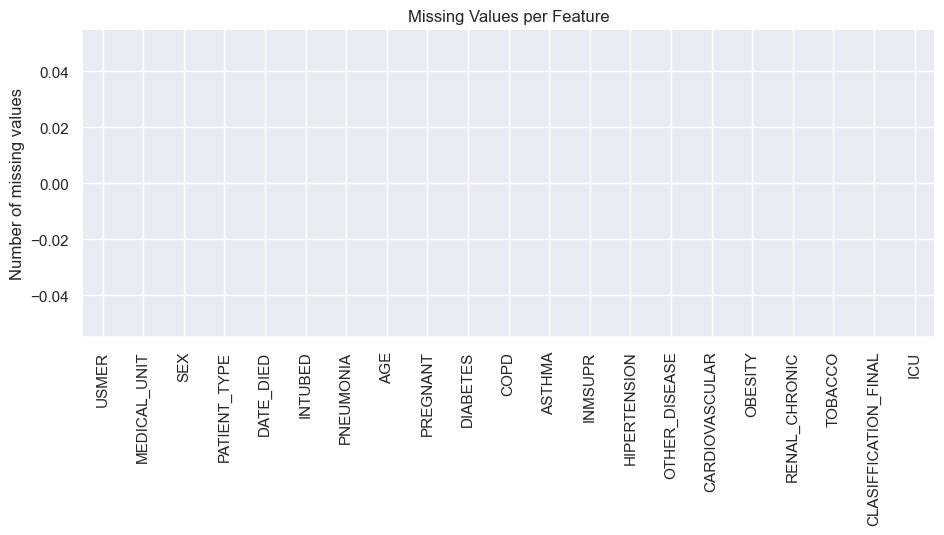

In [60]:
# the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(df).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature')

In [61]:
df["SEX"].unique()

array([1, 2], dtype=int64)

In [62]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236526 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 236526 non-null  int64 
 1   MEDICAL_UNIT          236526 non-null  int64 
 2   SEX                   236526 non-null  int64 
 3   PATIENT_TYPE          236526 non-null  int64 
 4   DATE_DIED             236526 non-null  object
 5   INTUBED               236526 non-null  int32 
 6   PNEUMONIA             236526 non-null  int32 
 7   AGE                   236526 non-null  int64 
 8   PREGNANT              236526 non-null  int32 
 9   DIABETES              236526 non-null  int32 
 10  COPD                  236526 non-null  int32 
 11  ASTHMA                236526 non-null  int32 
 12  INMSUPR               236526 non-null  int32 
 13  HIPERTENSION          236526 non-null  int32 
 14  OTHER_DISEASE         236526 non-null  int32 
 15  CARDIOVASCULAR  

In [64]:
## Now let us see the unique values for each column.
for i in df.columns:
    if(i!='AGE' and i!='DATE_DIED'):
        print(i," -> ", str(df[i].unique()))

USMER  ->  [2 1]
MEDICAL_UNIT  ->  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
SEX  ->  [1 2]
PATIENT_TYPE  ->  [1 2]
INTUBED  ->  [1 2]
PNEUMONIA  ->  [1 2]
PREGNANT  ->  [2 1]
DIABETES  ->  [2 1]
COPD  ->  [2 1]
ASTHMA  ->  [2 1]
INMSUPR  ->  [2 1]
HIPERTENSION  ->  [1 2]
OTHER_DISEASE  ->  [2 1]
CARDIOVASCULAR  ->  [2 1]
OBESITY  ->  [2 1]
RENAL_CHRONIC  ->  [2 1]
TOBACCO  ->  [2 1]
CLASIFFICATION_FINAL  ->  [0 1]
ICU  ->  [1 2]


In [65]:
df["SEX"].unique()

array([1, 2], dtype=int64)

In [66]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,1,1,65,2,2,...,2,2,1,2,2,2,2,2,0,1
1,2,1,2,1,03/06/2020,1,1,72,1,2,...,2,2,1,2,2,1,1,2,1,1
2,2,1,2,2,09/06/2020,1,2,55,1,1,...,2,2,2,2,2,2,2,2,0,2
3,2,1,1,1,12/06/2020,1,2,53,2,2,...,2,2,2,2,2,2,2,2,1,1
4,2,1,2,1,21/06/2020,1,2,68,1,1,...,2,2,1,2,2,2,2,2,0,1


In [67]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [68]:
df["CLASIFFICATION_FINAL"].value_counts()

1    123238
0    113288
Name: CLASIFFICATION_FINAL, dtype: int64

<AxesSubplot:xlabel='CLASIFFICATION_FINAL'>

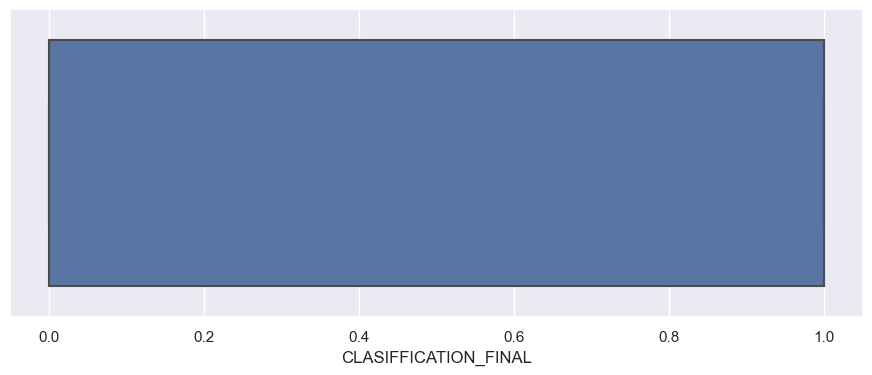

In [69]:
sns.boxplot(x = df["CLASIFFICATION_FINAL"])

<AxesSubplot:xlabel='CLASIFFICATION_FINAL', ylabel='count'>

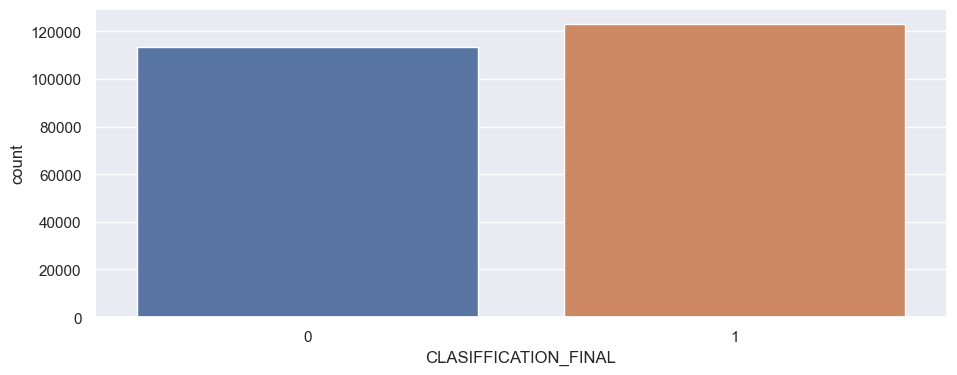

In [70]:
sns.countplot(x = df["CLASIFFICATION_FINAL"])

<AxesSubplot:xlabel='TOBACCO', ylabel='count'>

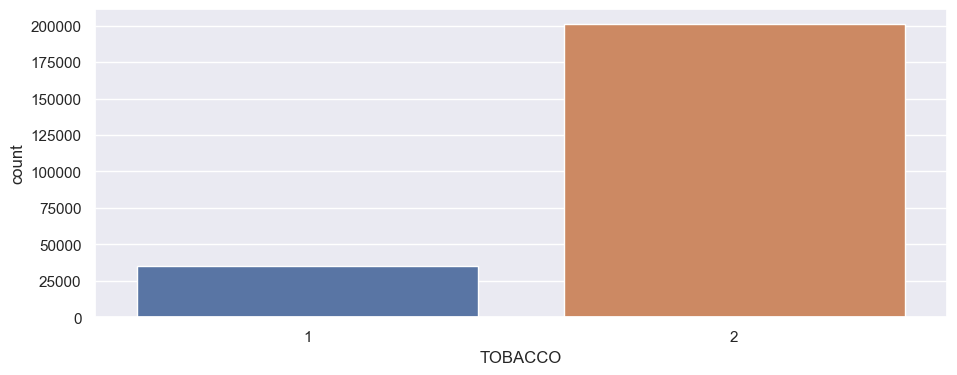

In [36]:
sns.countplot(x = df["TOBACCO"])

<AxesSubplot:xlabel='AGE', ylabel='Count'>

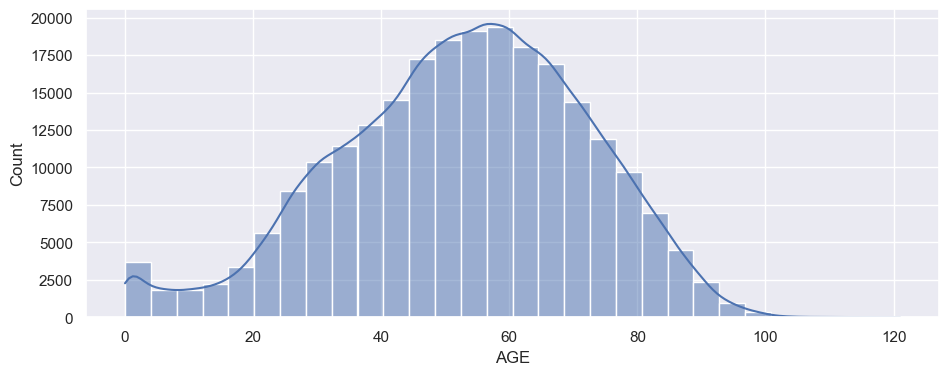

In [58]:
## Age
sns.histplot(data=df,x='AGE',bins=30,kde=True)

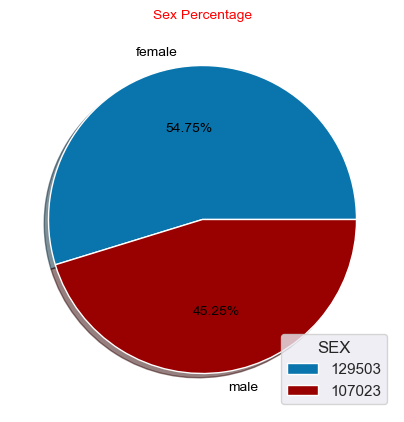

In [59]:
labels=['female','male']
sizes = df['SEX'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', textprops={'fontsize':10, 'color':"black"}, colors = colors,shadow=True, startangle=0)
plt.title('Sex Percentage',color = 'red',fontsize = 10)
plt.legend(df['SEX'].value_counts(), loc = 'lower right', title = 'SEX')
plt.show()

In [63]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

Text(0.5, 0, "{'Home': 1, 'Hospitalization': 2}")

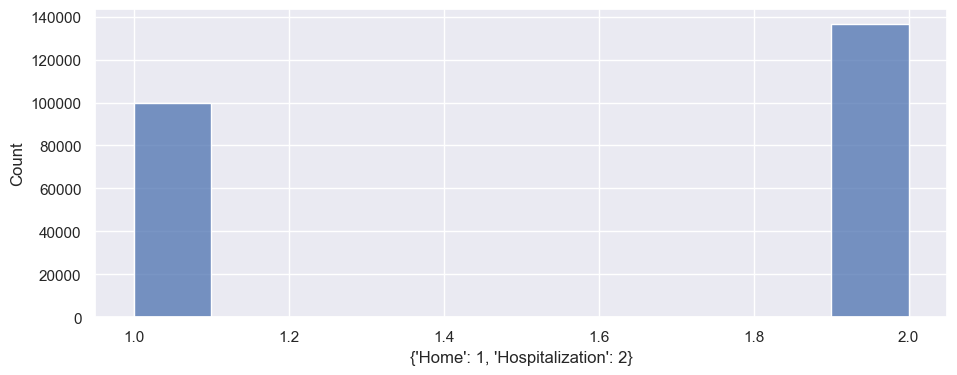

In [65]:
##  PATIENT_TYPE
data2 = {'Home': 1 ,'Hospitalization':2}
sns.histplot(data=df,x='PATIENT_TYPE',bins=10)
plt.xlabel(data2)

Text(0.5, 1.0, 'classification:the degrees of Covid_19')

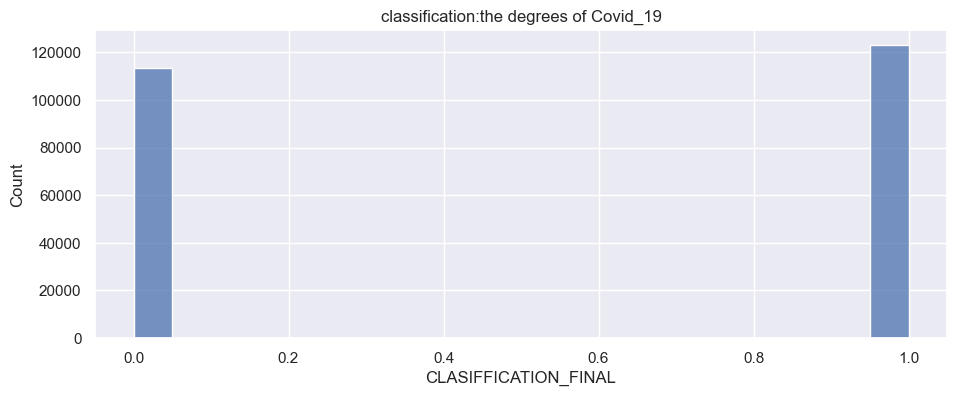

In [66]:
##  CLASIFFICATION_FINAL
sns.histplot(data=df,x='CLASIFFICATION_FINAL',bins=20)
plt.title('classification:the degrees of Covid_19')

In [35]:
df["SEX"].unique()

array([1, 2], dtype=int64)

Text(0.5, 1.0, 'PREGNANT')

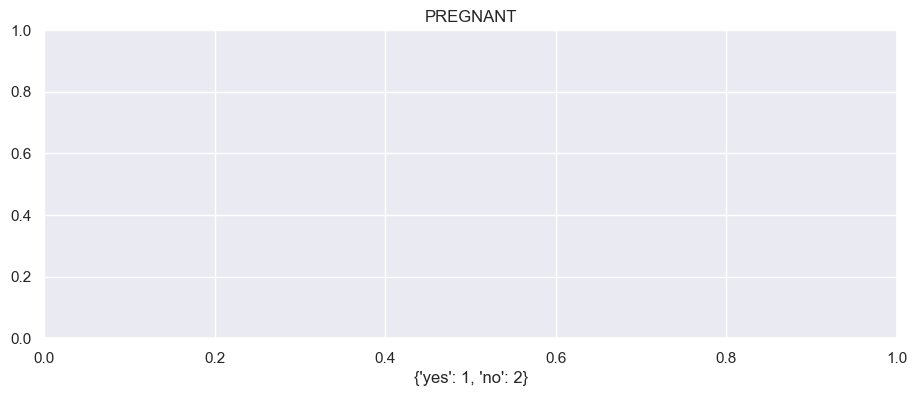

In [39]:
## show the females are PREGNANT and have covid_19
data3 = {'yes':1,'no':2}
sns.histplot(data=df[df['SEX']==1],x='PREGNANT')
plt.xlabel(data3)
plt.title('PREGNANT')

In [80]:
df["SEX"] = df["SEX"].map({1: "male", 2:"female"})

In [86]:
df.groupby(["SEX"])["CLASIFFICATION_FINAL"].mean().kind = "countplot"

<AxesSubplot:xlabel='SEX'>

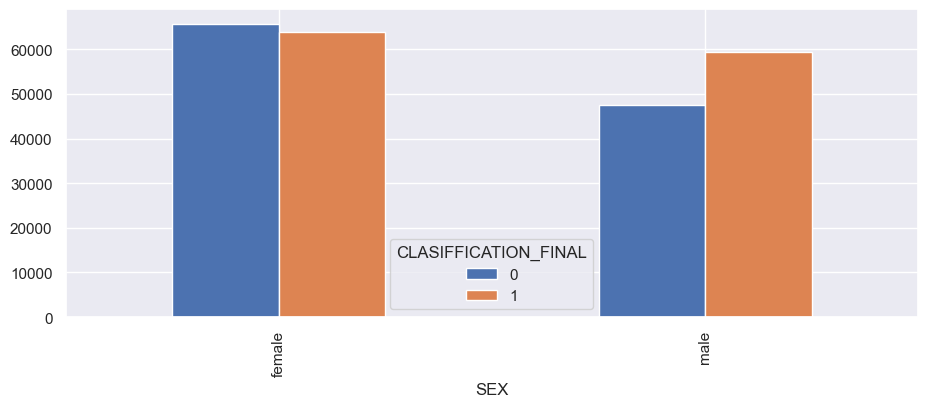

In [90]:
df.pivot_table(index=['SEX'],columns='CLASIFFICATION_FINAL',aggfunc='size').plot(kind='bar')


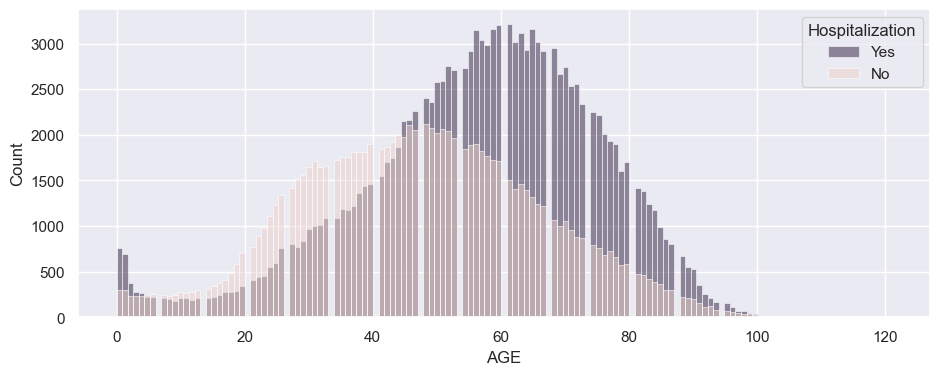

In [71]:
# Relation between AGE and PATIENT_TYPE
sns.histplot(data = df, x='AGE', hue = 'PATIENT_TYPE') 
plt.legend(title='Hospitalization', loc='upper right', labels=['Yes', 'No'])
plt.show()

<AxesSubplot:xlabel='DIABETES', ylabel='HIPERTENSION'>

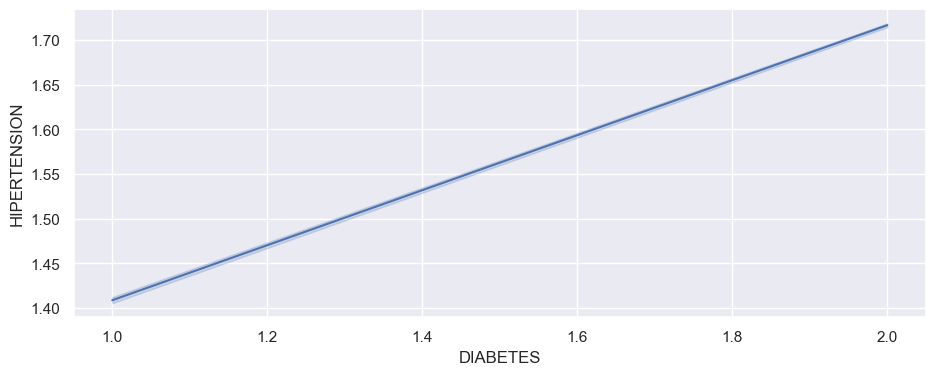

In [72]:
## Relation between DIABETES and HIPERTENSION
sns.lineplot(data=df,x='DIABETES',y='HIPERTENSION')

<AxesSubplot:xlabel='DIABETES', ylabel='OBESITY'>

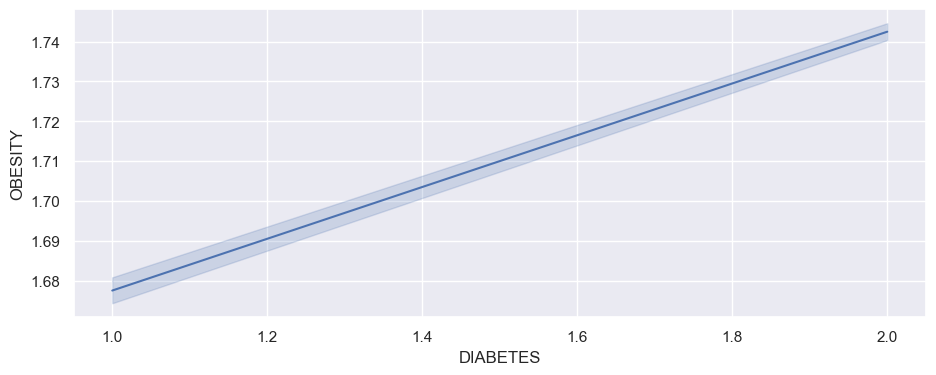

In [73]:
## Relation between DIABETES and OBESITY
sns.lineplot(data=df,x='DIABETES',y='OBESITY')

<AxesSubplot:xlabel='HIPERTENSION', ylabel='OBESITY'>

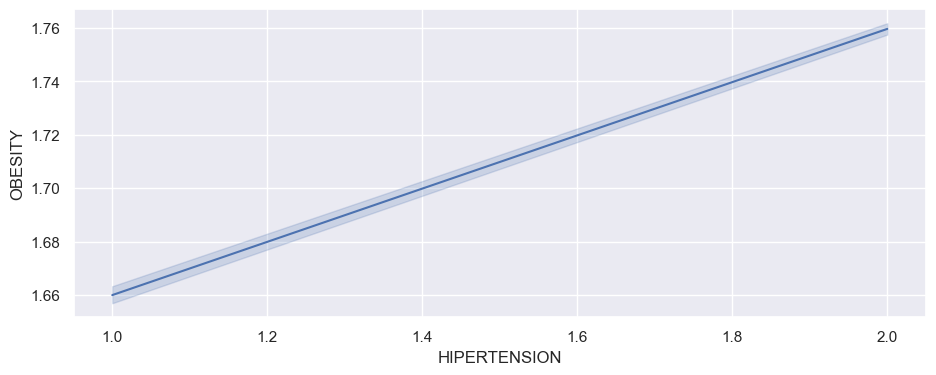

In [74]:
## Relation between DIABETES and HIPERTENSION
sns.lineplot(data=df,x='HIPERTENSION',y='OBESITY')

<AxesSubplot:>

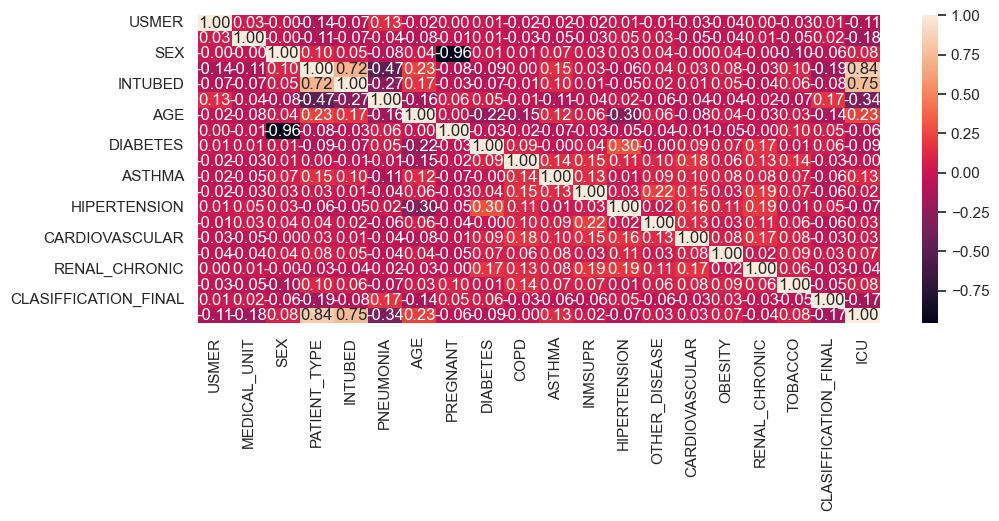

In [75]:
df.corr()
sns.heatmap(df.corr(),
           annot = True,
           fmt = ".2f")

In [77]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [78]:
x = df[['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO','ICU']]
y = df["CLASIFFICATION_FINAL"]

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236526 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 236526 non-null  int64 
 1   MEDICAL_UNIT          236526 non-null  int64 
 2   SEX                   236526 non-null  int64 
 3   PATIENT_TYPE          236526 non-null  int64 
 4   DATE_DIED             236526 non-null  object
 5   INTUBED               236526 non-null  int32 
 6   PNEUMONIA             236526 non-null  int32 
 7   AGE                   236526 non-null  int64 
 8   PREGNANT              236526 non-null  int32 
 9   DIABETES              236526 non-null  int32 
 10  COPD                  236526 non-null  int32 
 11  ASTHMA                236526 non-null  int32 
 12  INMSUPR               236526 non-null  int32 
 13  HIPERTENSION          236526 non-null  int32 
 14  OTHER_DISEASE         236526 non-null  int32 
 15  CARDIOVASCULAR  

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state = 0)

In [44]:
x_train.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
403659,2,9,1,2,2,1,79,2,1,2,2,2,1,1,2,1,2,2,2
724779,1,12,1,2,1,1,2,1,2,2,2,1,2,2,2,2,2,2,1
685477,2,12,2,1,1,2,8,1,2,2,2,2,2,2,2,2,2,2,1
892582,1,12,2,1,1,2,49,1,2,2,1,2,1,2,2,2,2,2,1
609991,1,12,2,1,1,2,25,1,1,2,2,2,2,2,2,2,2,2,1


In [45]:
x_test.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
455586,1,12,2,2,1,1,38,1,2,2,2,2,2,2,2,1,2,2,2
28801,2,4,1,2,1,1,56,2,2,2,2,2,2,2,2,1,2,2,1
810003,2,12,1,1,1,2,53,2,2,2,2,2,1,1,1,2,1,2,1
453354,1,12,2,2,1,1,79,1,2,2,2,2,1,2,2,2,2,2,2
696112,2,12,2,2,2,1,43,1,2,2,2,2,2,2,2,2,2,1,2


In [46]:
y_train

403659    0
724779    1
685477    1
892582    1
609991    0
         ..
472779    0
367515    1
467177    0
54349     0
663271    1
Name: CLASIFFICATION_FINAL, Length: 189220, dtype: int64

In [47]:
y_test

455586    0
28801     0
810003    1
453354    0
696112    1
         ..
446055    0
728111    1
373217    1
639537    0
210608    1
Name: CLASIFFICATION_FINAL, Length: 47306, dtype: int64

In [48]:
print(x_train.shape, y_train.shape)

(189220, 19) (189220,)


In [49]:
y_train.value_counts()

1    98703
0    90517
Name: CLASIFFICATION_FINAL, dtype: int64

# balancing data

In [50]:
import imblearn

from imblearn.over_sampling import SMOTE

In [51]:
s = SMOTE()

In [52]:
x_train,y_train = s.fit_resample(x_train,y_train)

In [53]:
print(x_train.shape, y_train.shape)

(197406, 19) (197406,)


In [54]:
y_train.value_counts()

0    98703
1    98703
Name: CLASIFFICATION_FINAL, dtype: int64

In [55]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)

In [56]:
x_test=std.transform(x_test)   

In [77]:
# 1st step  

def modelss(hp):      # hp is hyper parameter
    model = Sequential()
    model.add(Input(shape = (19,)))
    
    for i in range(hp.Int("hidden_layers", min_value = 5, max_value = 40)):
        model.add(Dense(units = hp.Int("neurons{}".format(i), min_value = 4, max_value = 80),activation = hp.Choice("activation", values = ["relu", "sigmoid", "tanh"]), kernel_initializer=hp.Choice("weight_init", values = ["glorot_uniform", "glorot_normal", "he_normal", "he_uniform"])))
        
    
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer=hp.Choice("optimizer", values = ["sgd","adam","adadelta","rmsprop"]),loss="binary_crossentropy",metrics=["accuracy"])
    
    return model

In [78]:
# randomsearch will call our func(modelss) randomly
# max_trials = ["sigmoid", "tanh", "relu"] = 3
# tuner

# 2nd step
tuner = k.RandomSearch(modelss, objective = "val_accuracy", max_trials = 6, directory = r"C:\Users\hp\Downloads\Data Science Innomatics\DS written notes\Deep_learning\DL_Notes\keras_tuner_models\randomss", project_name = "f18")   # obj--> used for maximise or minimize our loss

In [79]:
# 3rd step

tuner.search(x_train, y_train, epochs = 30, validation_data = (x_test, y_test))  # 12 trials means = 12 models

Trial 6 Complete [00h 15m 22s]
val_accuracy: 0.6258191466331482

Best val_accuracy So Far: 0.6258191466331482
Total elapsed time: 01h 40m 21s


In [80]:
tuner.search_space_summary()

Search space summary
Default search space size: 33
hidden_layers (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 40, 'step': 1, 'sampling': 'linear'}
neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 80, 'step': 1, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
weight_init (Choice)
{'default': 'glorot_uniform', 'conditions': [], 'values': ['glorot_uniform', 'glorot_normal', 'he_normal', 'he_uniform'], 'ordered': False}
neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 80, 'step': 1, 'sampling': 'linear'}
neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 80, 'step': 1, 'sampling': 'linear'}
neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 80, 'step': 1, 'sampling': 'linear'}
neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 80,

In [81]:
tuner.results_summary()

Results summary
Results in C:\Users\hp\Downloads\Data Science Innomatics\DS written notes\Deep_learning\DL_Notes\keras_tuner_models\randomss\f18
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 5 summary
Hyperparameters:
hidden_layers: 11
neurons0: 80
activation: tanh
weight_init: glorot_normal
neurons1: 11
neurons2: 13
neurons3: 41
neurons4: 30
optimizer: adadelta
neurons5: 55
neurons6: 77
neurons7: 43
neurons8: 35
neurons9: 19
neurons10: 20
neurons11: 48
neurons12: 25
neurons13: 25
neurons14: 16
neurons15: 6
neurons16: 50
neurons17: 49
neurons18: 39
neurons19: 50
neurons20: 43
neurons21: 60
neurons22: 16
neurons23: 68
neurons24: 46
neurons25: 43
neurons26: 33
neurons27: 54
neurons28: 79
Score: 0.6258191466331482

Trial 4 summary
Hyperparameters:
hidden_layers: 16
neurons0: 17
activation: relu
weight_init: glorot_normal
neurons1: 53
neurons2: 33
neurons3: 54
neurons4: 51
optimizer: adadelta
neurons5: 53
neurons6: 67
neurons7: 27
neurons8: 47
neurons9: 70
n

In [82]:
tuner.get_best_hyperparameters()[0].values

{'hidden_layers': 11,
 'neurons0': 80,
 'activation': 'tanh',
 'weight_init': 'glorot_normal',
 'neurons1': 11,
 'neurons2': 13,
 'neurons3': 41,
 'neurons4': 30,
 'optimizer': 'adadelta',
 'neurons5': 55,
 'neurons6': 77,
 'neurons7': 43,
 'neurons8': 35,
 'neurons9': 19,
 'neurons10': 20,
 'neurons11': 48,
 'neurons12': 25,
 'neurons13': 25,
 'neurons14': 16,
 'neurons15': 6,
 'neurons16': 50,
 'neurons17': 49,
 'neurons18': 39,
 'neurons19': 50,
 'neurons20': 43,
 'neurons21': 60,
 'neurons22': 16,
 'neurons23': 68,
 'neurons24': 46,
 'neurons25': 43,
 'neurons26': 33,
 'neurons27': 54,
 'neurons28': 79}

In [83]:
fmodel = tuner.get_best_models(num_models=1)[0]

In [84]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                1600      
                                                                 
 dense_1 (Dense)             (None, 11)                891       
                                                                 
 dense_2 (Dense)             (None, 13)                156       
                                                                 
 dense_3 (Dense)             (None, 41)                574       
                                                                 
 dense_4 (Dense)             (None, 30)                1260      
                                                                 
 dense_5 (Dense)             (None, 55)                1705      
                                                                 
 dense_6 (Dense)             (None, 77)                4

In [85]:
hist = fmodel.fit(x_train, y_train, epochs = 30, batch_size = 15 ,validation_split= 0.1)

Epoch 1/30
11845/11845 [==============================] - 54s 4ms/step - loss: 0.6535 - accuracy: 0.6234 - val_loss: 0.6685 - val_accuracy: 0.5993
Epoch 2/30
11845/11845 [==============================] - 51s 4ms/step - loss: 0.6532 - accuracy: 0.6239 - val_loss: 0.6686 - val_accuracy: 0.5981
Epoch 3/30
11845/11845 [==============================] - 52s 4ms/step - loss: 0.6530 - accuracy: 0.6241 - val_loss: 0.6694 - val_accuracy: 0.5974
Epoch 4/30
11845/11845 [==============================] - 51s 4ms/step - loss: 0.6529 - accuracy: 0.6244 - val_loss: 0.6703 - val_accuracy: 0.5960
Epoch 5/30
11845/11845 [==============================] - 41s 4ms/step - loss: 0.6527 - accuracy: 0.6245 - val_loss: 0.6709 - val_accuracy: 0.5939
Epoch 6/30
11845/11845 [==============================] - 41s 3ms/step - loss: 0.6526 - accuracy: 0.6245 - val_loss: 0.6707 - val_accuracy: 0.5940
Epoch 7/30
11845/11845 [==============================] - 60s 5ms/step - loss: 0.6525 - accuracy: 0.6247 - val_loss: 0

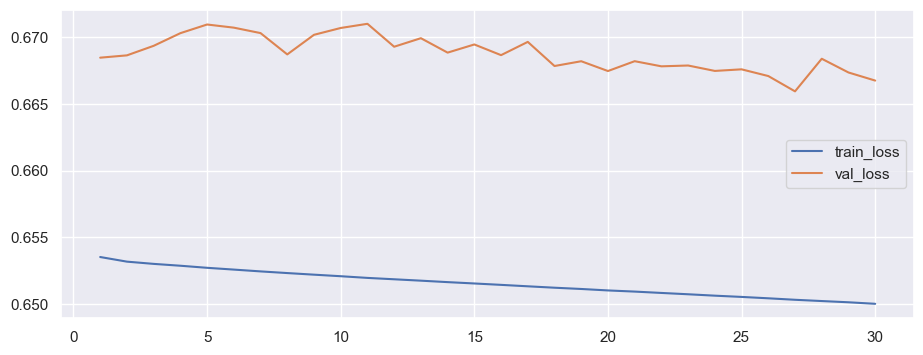

In [86]:
plt.plot(range(1,31),hist.history["loss"],label="train_loss")
plt.plot(range(1,31),hist.history["val_loss"],label="val_loss")
plt.legend()

In [87]:
hist.history['val_loss']

[0.6684640049934387,
 0.6686372756958008,
 0.66935133934021,
 0.6702997088432312,
 0.6709489226341248,
 0.6707133054733276,
 0.6703054308891296,
 0.6687086820602417,
 0.6701765656471252,
 0.6706886291503906,
 0.6710012555122375,
 0.6692841649055481,
 0.6699231863021851,
 0.6688424348831177,
 0.6694537997245789,
 0.668653666973114,
 0.6696470379829407,
 0.667839765548706,
 0.6681972146034241,
 0.667463481426239,
 0.6682005524635315,
 0.6678160429000854,
 0.6678773164749146,
 0.6674715876579285,
 0.6675910353660583,
 0.6670880317687988,
 0.6659412980079651,
 0.6683831810951233,
 0.6673550605773926,
 0.6667488217353821]

In [88]:
predicted=fmodel.predict(x_test)

1479/1479 [==============================] - 4s 2ms/step


In [89]:
predicted=np.where(predicted>0.5,1,0)

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [91]:
print('accuracy:',accuracy_score(y_test,predicted))

accuracy: 0.6301314843783029


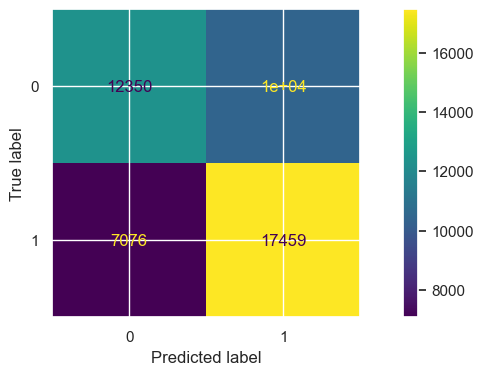

In [92]:
cm = confusion_matrix(y_test,predicted)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()